In [1]:
import sys
import numpy
import pandas
import matplotlib
import sklearn



In [5]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split



In [6]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump_thickness','uniform_cell-size','uniform_cell-shape','marginal adhesion','signle_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df=pd.read_csv(url,names=names)

In [21]:
print(df)

     clump_thickness  uniform_cell-size  uniform_cell-shape  \
0                  5                  1                   1   
1                  5                  4                   4   
2                  3                  1                   1   
3                  6                  8                   8   
4                  4                  1                   1   
..               ...                ...                 ...   
694                3                  1                   1   
695                2                  1                   1   
696                5                 10                  10   
697                4                  8                   6   
698                4                  8                   8   

     marginal adhesion  signle_epithelial_size bare_nuclei  bland_chromatin  \
0                    1                       2           1                3   
1                    5                       7          10                3   
2     

In [7]:
df.replace('?',-99999,inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell-size', 'uniform_cell-shape',
       'marginal adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [20]:
print(df[0:9])
print(df.describe())
print(df.shape)
print(df.loc[299])

   clump_thickness  uniform_cell-size  uniform_cell-shape  marginal adhesion  \
0                5                  1                   1                  1   
1                5                  4                   4                  5   
2                3                  1                   1                  1   
3                6                  8                   8                  1   
4                4                  1                   1                  3   
5                8                 10                  10                  8   
6                1                  1                   1                  1   
7                2                  1                   2                  1   
8                2                  1                   1                  1   

   signle_epithelial_size bare_nuclei  bland_chromatin  normal_nucleoli  \
0                       2           1                3                1   
1                       7          10            

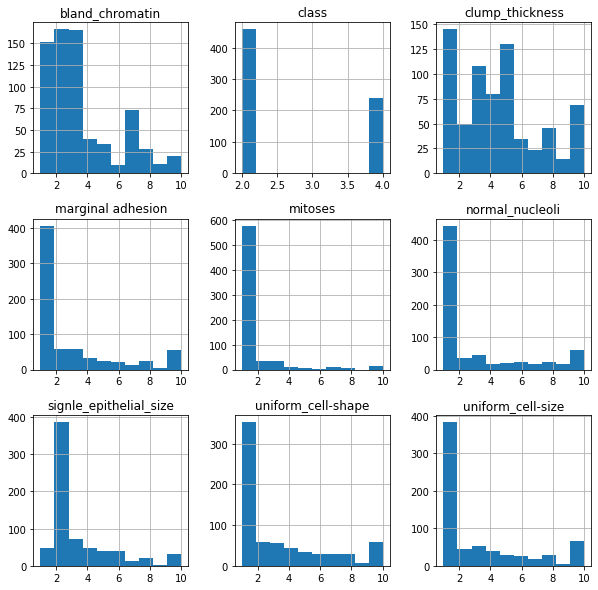

In [9]:
df.hist(figsize=(10,10))
plt.show()

In [10]:
X=np.array(df.drop(['class'],1))
Y=np.array(df['class'])
           
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)  
Y


array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,

In [11]:
X

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

In [12]:
from sklearn.model_selection import KFold
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))
print(models)
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10,random_state=8)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

[('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))]
KNN:0.966006(0.018651)


C:\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change f

SVM:0.958864(0.019626)


In [17]:
for name,model in models:
    model.fit(X_train,Y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test,predictions))
    print(classification_report(Y_test,predictions))

KNN
0.95
              precision    recall  f1-score   support

           2       0.96      0.97      0.96        94
           4       0.93      0.91      0.92        46

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140

SVM
0.9642857142857143
              precision    recall  f1-score   support

           2       0.99      0.96      0.97        94
           4       0.92      0.98      0.95        46

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



C:\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
predictions

array([2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 2], dtype=int64)

In [19]:
clf=SVC()
clf.fit(X_train,Y_train)
accuracy=clf.score(X_train,Y_train)
print(accuracy)
example=np.array([[4,2,1,1,1,2,3,2,10]])
example=example.reshape(len(example),-1)
predictions=clf.predict(example)
print(predictions)

0.9964221824686941
[4]


C:\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
